# Проектная работа
# Анализ и прогнозирование оттока клиентов в сети фитнес-центров «Культурист-датасаентист»

**Заголовок:** Анализ и прогнозирование оттока клиентов в сети фитнес-центров «Культурист-датасаентист»

**Описание проекта:** Проект направлен на анализ и прогнозирование оттока клиентов в сети фитнес-центров «Культурист-датасаентист» с использованием клиентских данных. В рамках проекта необходимо выявить группы клиентов с высоким риском ухода, проанализировать факторы, влияющие на отток, и разработать меры по его снижению. Основная цель — выработать рекомендации для стратегии взаимодействия с клиентами и их удержания.

**Ход исследования:**
1. [Импорт необходимых библиотек. Загрузка и предварительное ознакомление с данными.](#step_1)
2. [Проведение исследовательского анализа данных (EDA).](#step_2)
3. [Построение модели прогнозирования оттока клиентов.](#step_3)
4. [Кластеризация клиентов.](#step_4)
5. [Формулирование выводов и разработка рекомендаций по работе с клиентами.](#step_5)

**Шаг 1.** 

**Импорт необходимых библиотек. Загрузка и предварительное ознакомление с данными.**
<a id="step_1"></a>

In [1]:
# Импортирование необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [2]:
# Загружаем датафрейм 
df = pd.read_csv('/datasets/gym_churn.csv')
# Выводим на экран первые 10 записей
df.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [3]:
# Выводим на экран количество записей и полей в датасете
print(f'Число записей в датафрейме {df.shape[0]}')
print(f'Число полей в датафрейме {df.shape[1]}')

Число записей в датафрейме 4000
Число полей в датафрейме 14


In [4]:
# Приведем наименование полей к snake_case
df.columns = [column.lower() for column in df.columns]
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [5]:
# Проверка на дублирование строк
print(f'Количество дубликатов в датасете: {df.duplicated().sum()}')

Количество дубликатов в датасете: 0


1. Импортированы необходимые библиотеки.
2. Загружен датасет `gym_churn.csv`.
3. Наименования полей приведены к формату *snake_case*.
4. В датасете содержится 14 полей и 4000 записей.
5. Дубликаты отсутствуют.

**Шаг 2.** 

**Проведение исследовательского анализа данных (EDA).**
<a id="step_2"></a>

In [6]:
# Проверяем наличие пропусков в датасете
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
print(report.sort_values(by = 'missing_values', ascending = False))
print()

if report['missing_values'].sum() == 0:
    print('В датасете нет пропусков')

                                   missing_values  % of total
gender                                          0         0.0
near_location                                   0         0.0
partner                                         0         0.0
promo_friends                                   0         0.0
phone                                           0         0.0
contract_period                                 0         0.0
group_visits                                    0         0.0
age                                             0         0.0
avg_additional_charges_total                    0         0.0
month_to_end_contract                           0         0.0
lifetime                                        0         0.0
avg_class_frequency_total                       0         0.0
avg_class_frequency_current_month               0         0.0
churn                                           0         0.0

В датасете нет пропусков


In [7]:
# Проверяем количество оставшихся и ушедших клиентов
print(f'Количество ушедших клиентов: {df["churn"].sum()}')
print(f'Количество оставшихся клиентов: {df.shape[0] - df["churn"].sum()}')
print(f'Процент оттока клиентов: {round(df["churn"].sum() / df.shape[0] * 100, 1)} %')

Количество ушедших клиентов: 1061
Количество оставшихся клиентов: 2939
Процент оттока клиентов: 26.5 %


In [8]:
# Проверяем средние значения и стандартные отклонения
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


По средним значениям и стандартным отклонениям можно сделать следующие выводы:

1. Пол (gender) в данных представлен примерно равным количеством мужчин и женщин.

2. Проживание или работа в районе (near_location) — большинство клиентов живет или работает рядом со спортзалом.

3. Сотрудники компаний-партнеров клуба (partner) составляют чуть меньше половины клиентов.

4. Приведи друга (promo_friends) — около трети клиентов использовали промо-код от знакомого при оплате первого абонемента.

5. Наличие контактного телефона (phone) — около 90% клиентов предоставили фитнес-клубу контактный номер.

6. Длительность текущего действующего абонемента (contract_period) — среднее арифметическое и стандартное отклонение примерно равны между собой и составляют около 4 месяцев, что говорит о большой вариативности данных. Необходимо сравнить эти значения отдельно по группам (ушедшие/неушедшие пользователи).

7. Посещение групповых занятий (group_visits) — около 40% пользователей посещают групповые занятия.

8. Возраст (age) — средний возраст клиентов равен 29.1, стандартное отклонение составляет 3.2, что говорит о том, что большая часть пользователей фитнес-клуба имеет возраст от 26 до 32 лет.

9. Суммарная выручка от других услуг (avg_additional_charges_total) — среднее значение равно 146.9, а стандартное отклонение — 96.3, что говорит о большом разбросе в этой характеристике.

10. Срок до окончания текущего действующего абонемента (monthtoend_contract) — среднее арифметическое и стандартное отклонение примерно равны между собой и составляют около 4 месяцев, что говорит о большой вариативности данных. Необходимо сравнить эти значения отдельно по группам (ушедшие/неушедшие пользователи).

11. Время с момента первого обращения в фитнес-центр (lifetime) — среднее арифметическое и стандартное отклонение примерно равны между собой и составляют около 3 месяцев, что говорит о большой вариативности данных. Необходимо сравнить эти значения отдельно по группам (ушедшие/неушедшие пользователи).

12. Средняя частота посещений в неделю за все время с начала действия абонемента (avgclassfrequency_total) — среднее значение равно 1.87, стандартное отклонение равно 0.97, что говорит о больших отличиях среди пользователей по средней частоте посещения фитнес-клуба.

13. Средняя частота посещений в неделю за предыдущий месяц (avgclassfrequencycurrentmonth) — среднее значение равно 1.76, стандартное отклонение равно 1.05, что также указывает на большие отличия среди пользователей в частоте походов в спортзал.

14. Факт оттока в текущем месяце (churn) — среднее значение равно 0.26, что говорит о том, что в среднем отток клиентов составляет 26%.

In [9]:
# Изучим средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

# Cгруппируем датафрем по churn и посчитаем средние значения в остальных полях
df_groupby_churn = df.groupby('churn').mean()

# Развернем таблицу "вертикально"
df_groupby_churn = df_groupby_churn.transpose()

# Сбросим индексы и присвоим понятные значения полям
df_groupby_churn.reset_index(inplace=True)
df_groupby_churn.columns = ['column_name', 'churn_0', 'churn_1' ]

# Посчитаем процент на который отличаются средние значения в двух группах
df_groupby_churn['diff_percent'] = (
    (df_groupby_churn['churn_0'] - df_groupby_churn['churn_1']) / df_groupby_churn['churn_0'] * 100).round(1)

# Отсортируем по проценту отличий показателей для наглядности и выведем на печать датафрейм
df_groupby_churn.sort_values(by='diff_percent', ascending=False)

,column_name,churn_0,churn_1,diff_percent
10,lifetime,4.711807,0.990575,79.0
5,contract_period,5.747193,1.728558,69.9
9,month_to_end_contract,5.283089,1.662582,68.5
12,avg_class_frequency_current_month,2.027882,1.044546,48.5
3,promo_friends,0.353522,0.183789,48.0
6,group_visits,0.464103,0.268615,42.1
2,partner,0.534195,0.355325,33.5
8,avg_additional_charges_total,158.445715,115.082899,27.4
11,avg_class_frequency_total,2.024876,1.474995,27.2
1,near_location,0.873086,0.768143,12.0


Изучив таблицу `df_groupby_churn`, можно выделить шесть признаков, по которым ушедшие и неушедшие пользователи значительно отличаются:

1. lifetime — "время жизни клиента" у ушедших пользователей почти в 5 раз меньше, чем у оставшихся.

2. contract_period — средняя длительность контракта у ушедших пользователей в 3 раза меньше, чем у оставшихся.

3. monthtoend_contract — среднее число месяцев до окончания контракта у ушедших пользователей в 3 раза меньше, чем у оставшихся.

4. avg_class_frequency_current_month — средняя частота посещений за текущий месяц у ушедших пользователей в 2 раза меньше, чем у оставшихся.

5. promo_friends — среднее число пользователей, воспользовавшихся акцией "Приведи друга", у оставшихся пользователей больше в 2 раза по сравнению с ушедшими.

6. group_visits — оставшиеся пользователи в 2 раза чаще посещают групповые занятия.

Можно предположить, что именно эти характеристики будут иметь значение в прогнозировании с использованием методов машинного обучения.

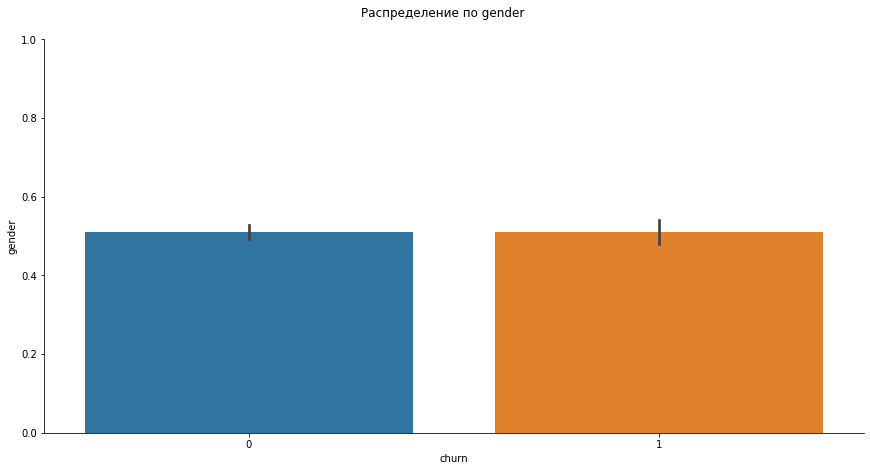

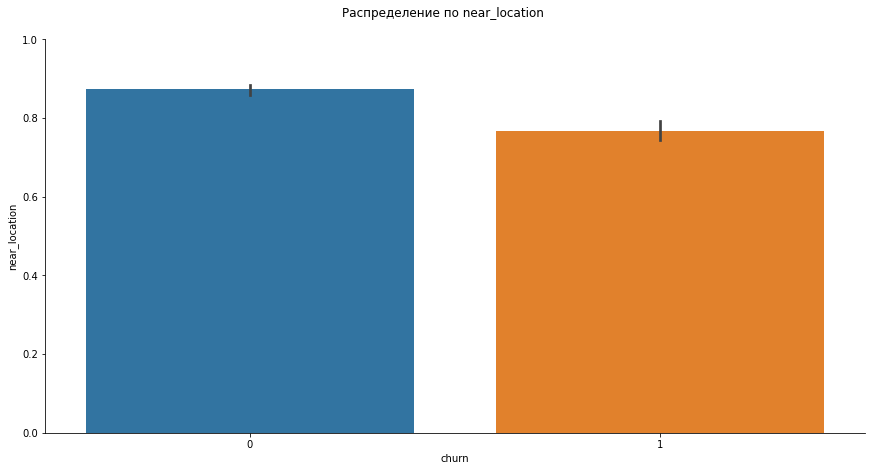

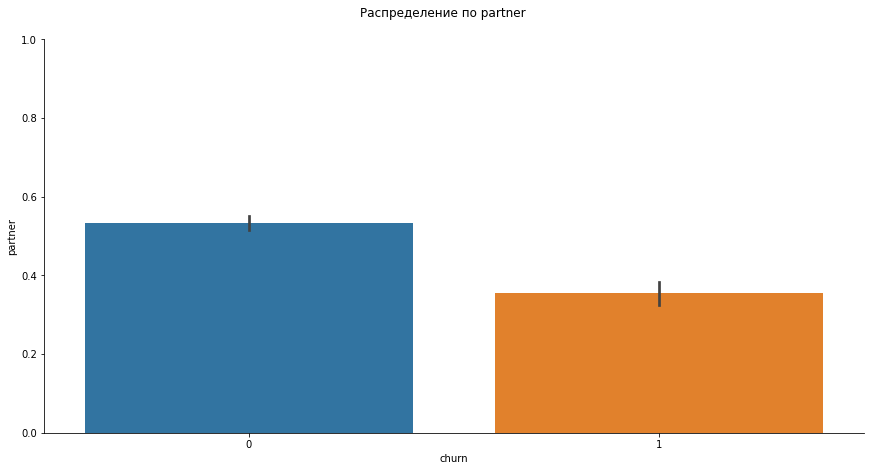

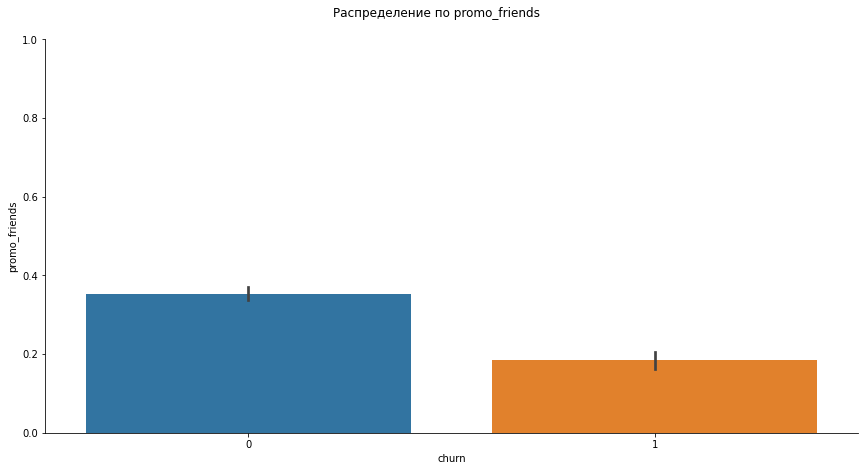

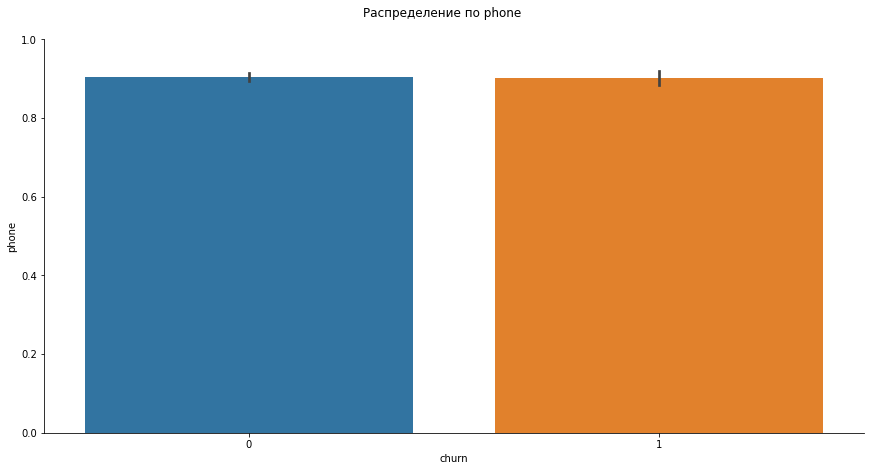

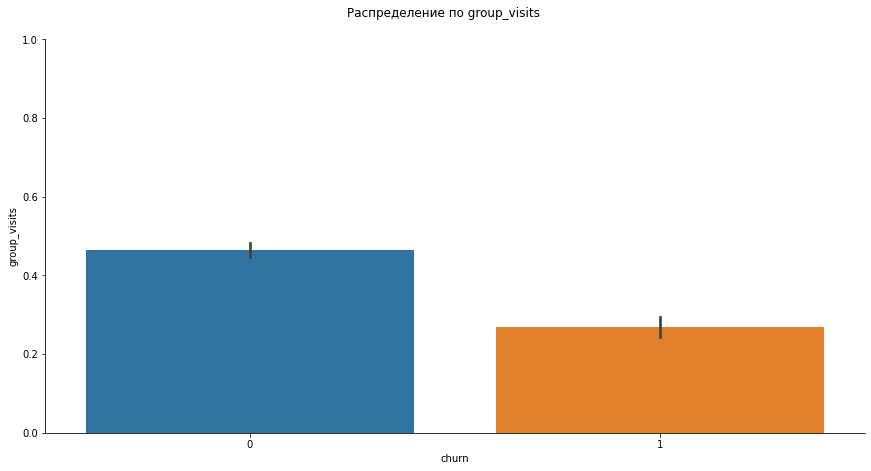

In [10]:
# Для построения распределений по кластерам сначала создадим датафрейм, 
# который будет содержать только столбцы с бинарными характеристиками
df_bin =  df.drop(['avg_additional_charges_total', 
         'month_to_end_contract', 'lifetime', 
         'avg_class_frequency_total', 
         'avg_class_frequency_current_month', 'contract_period', 'age'], axis=1)

# Создадим список с названиями столбцов и удалим из списка столбец с номером кластера
columns_list_bin = list(df_bin.columns)
columns_list_bin.remove('churn')

# Выведем на печать графики с помощью цикла
for column in columns_list_bin:
    # Создание графика и сохранение его в переменную g с заданными параметрами размера
    g = sns.catplot(
        data=df_bin, # Определяем датафрейм для графиков
        x="churn", # Задаем ось Х, на которой будут отображаться кластеры
        y=column, # По оси Y будут выводится характеристики из датасета
        kind="bar", 
        height=6, 
        aspect=2,)

    # Настройка графика
    g.set_axis_labels("churn", column)  # Подписываем оси
    g.set_xticklabels(["0", "1"])  # Устанавливаем метки для оси X
    g.fig.suptitle(f"Распределение по {column}", y=1.05)  # Устанавливаем название графика
    g.set(ylim=(0, 1))  # Ограничиваем значения по оси Y

    # Отображаем график
    plt.show()

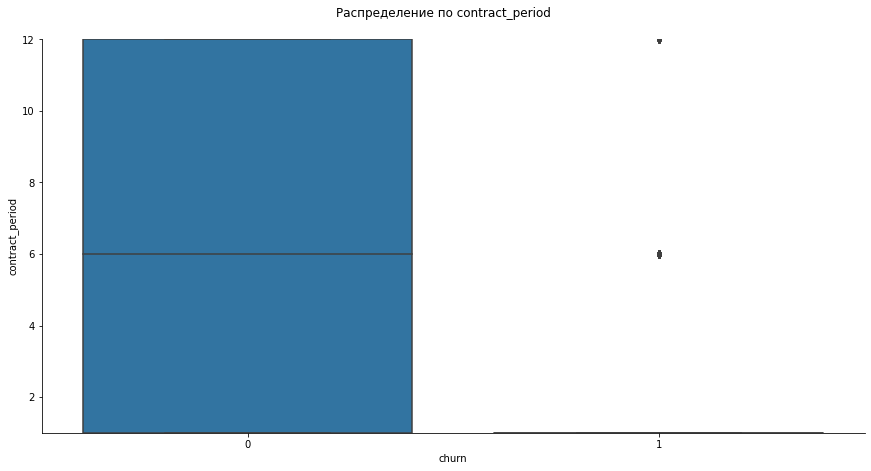

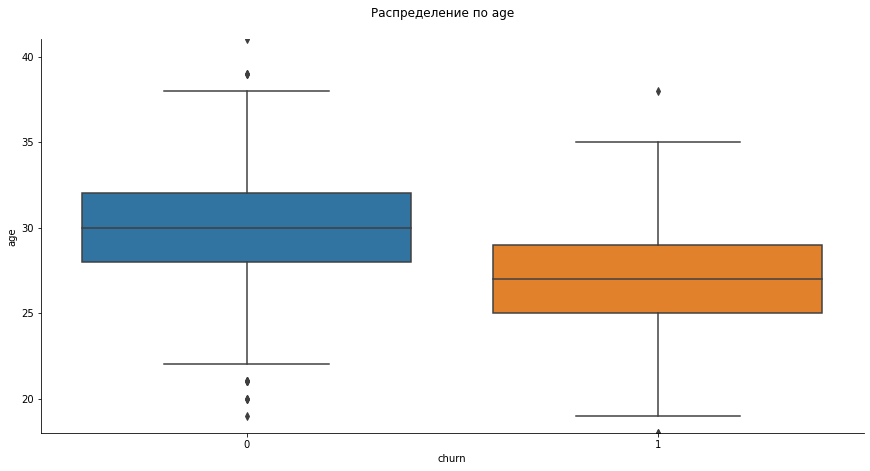

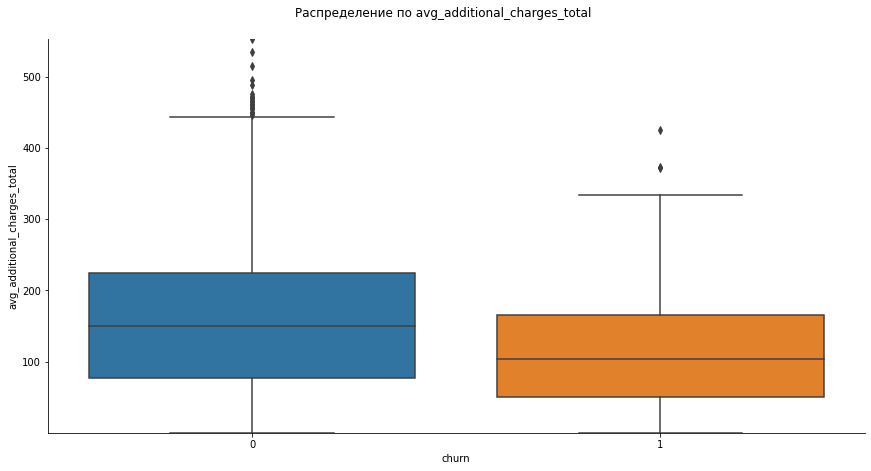

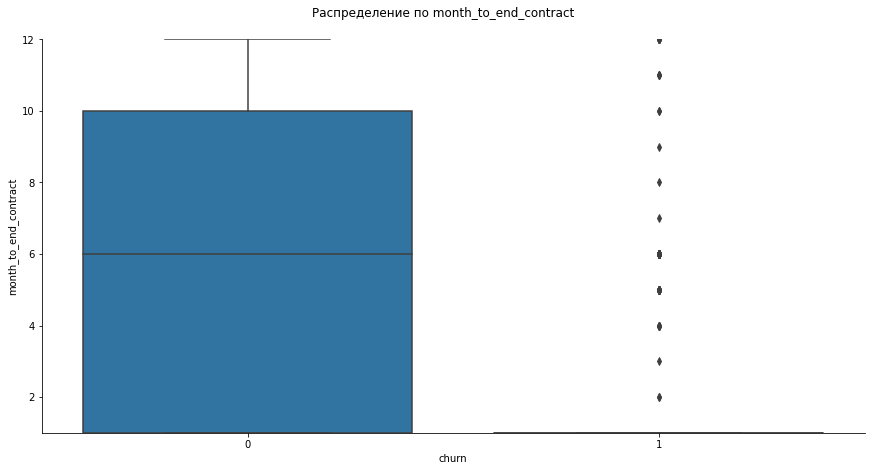

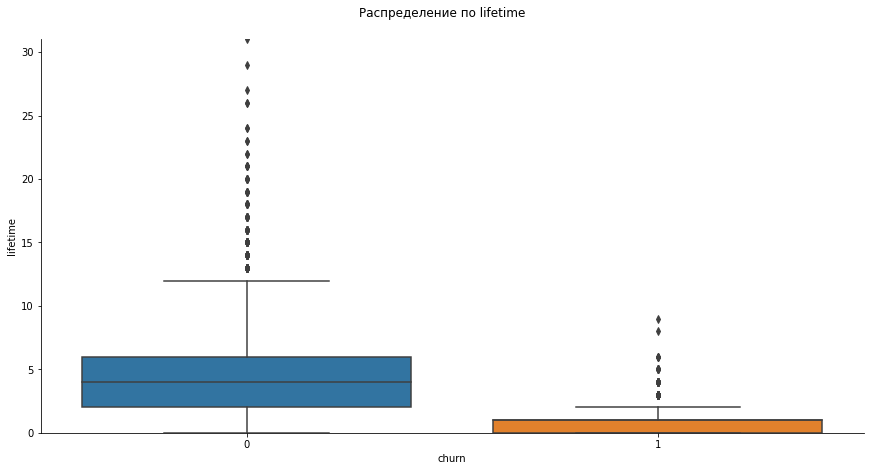

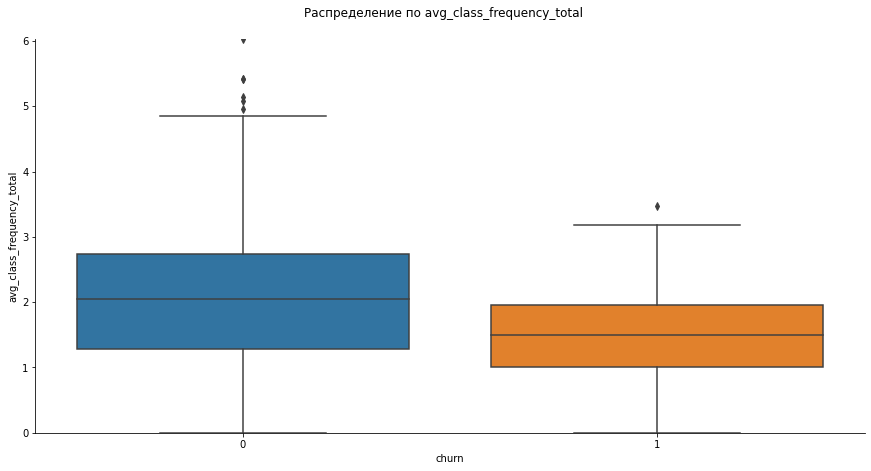

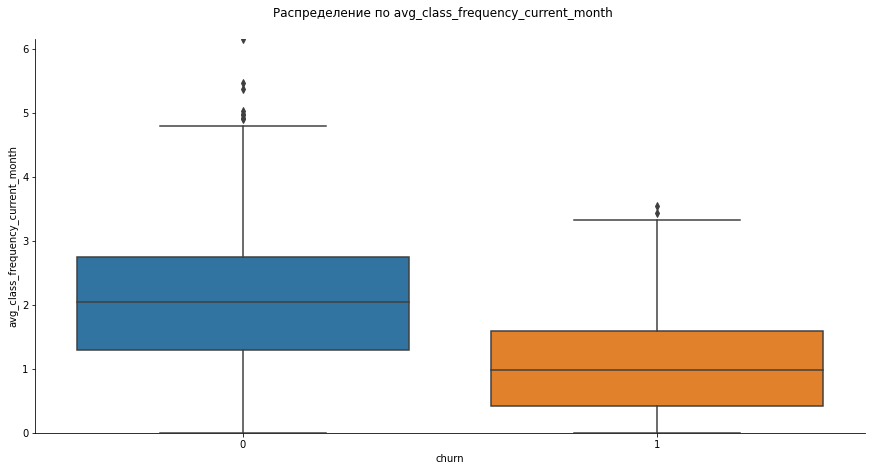

In [11]:
# Для построения распределений по кластерам сначала создадим датафрейм, 
# который будет содержать только столбцы с действительные числами
df_num =  df.drop(['gender', 
         'near_location', 'partner', 
         'promo_friends', 
         'phone', 'group_visits'], axis=1)

# Создадим список с названиями столбцов и удалим из списка столбец с номером кластера
columns_list_num = list(df_num.columns)
columns_list_num.remove('churn')

# Выведем на печать графики с помощью цикла
for column in columns_list_num:
    # Создание графика и сохранение его в переменную g с заданными параметрами размера
    g = sns.catplot(
        data=df_num, # Определяем датафрейм для графиков
        x="churn", # Задаем ось Х, на которой будут отображаться кластеры
        y=column, # По оси Y будут выводится характеристики из датасета
        kind="box", 
        height=6, 
        aspect=2,)

    # Настройка графика
    g.set_axis_labels("churn", column)  # Подписываем оси
    g.set_xticklabels(["0", "1"])  # Устанавливаем метки для оси X
    g.fig.suptitle(f"Распределение по {column}", y=1.05)  # Устанавливаем название графика
    g.set(ylim=(df_num[column].min(), df_num[column].max()))  # Автоматически устанавливаем значения по оси Y

    # Отображаем график
    plt.show()

При рассмотрении графиков можно выделить три характеристики, где заметно отличаются распределения ушедших и неушедших пользователей:
1. contract_period
2. month_to_end_contract
3. lifetime


Эти характеристики также были отмечены в результате сравнения средних значений.

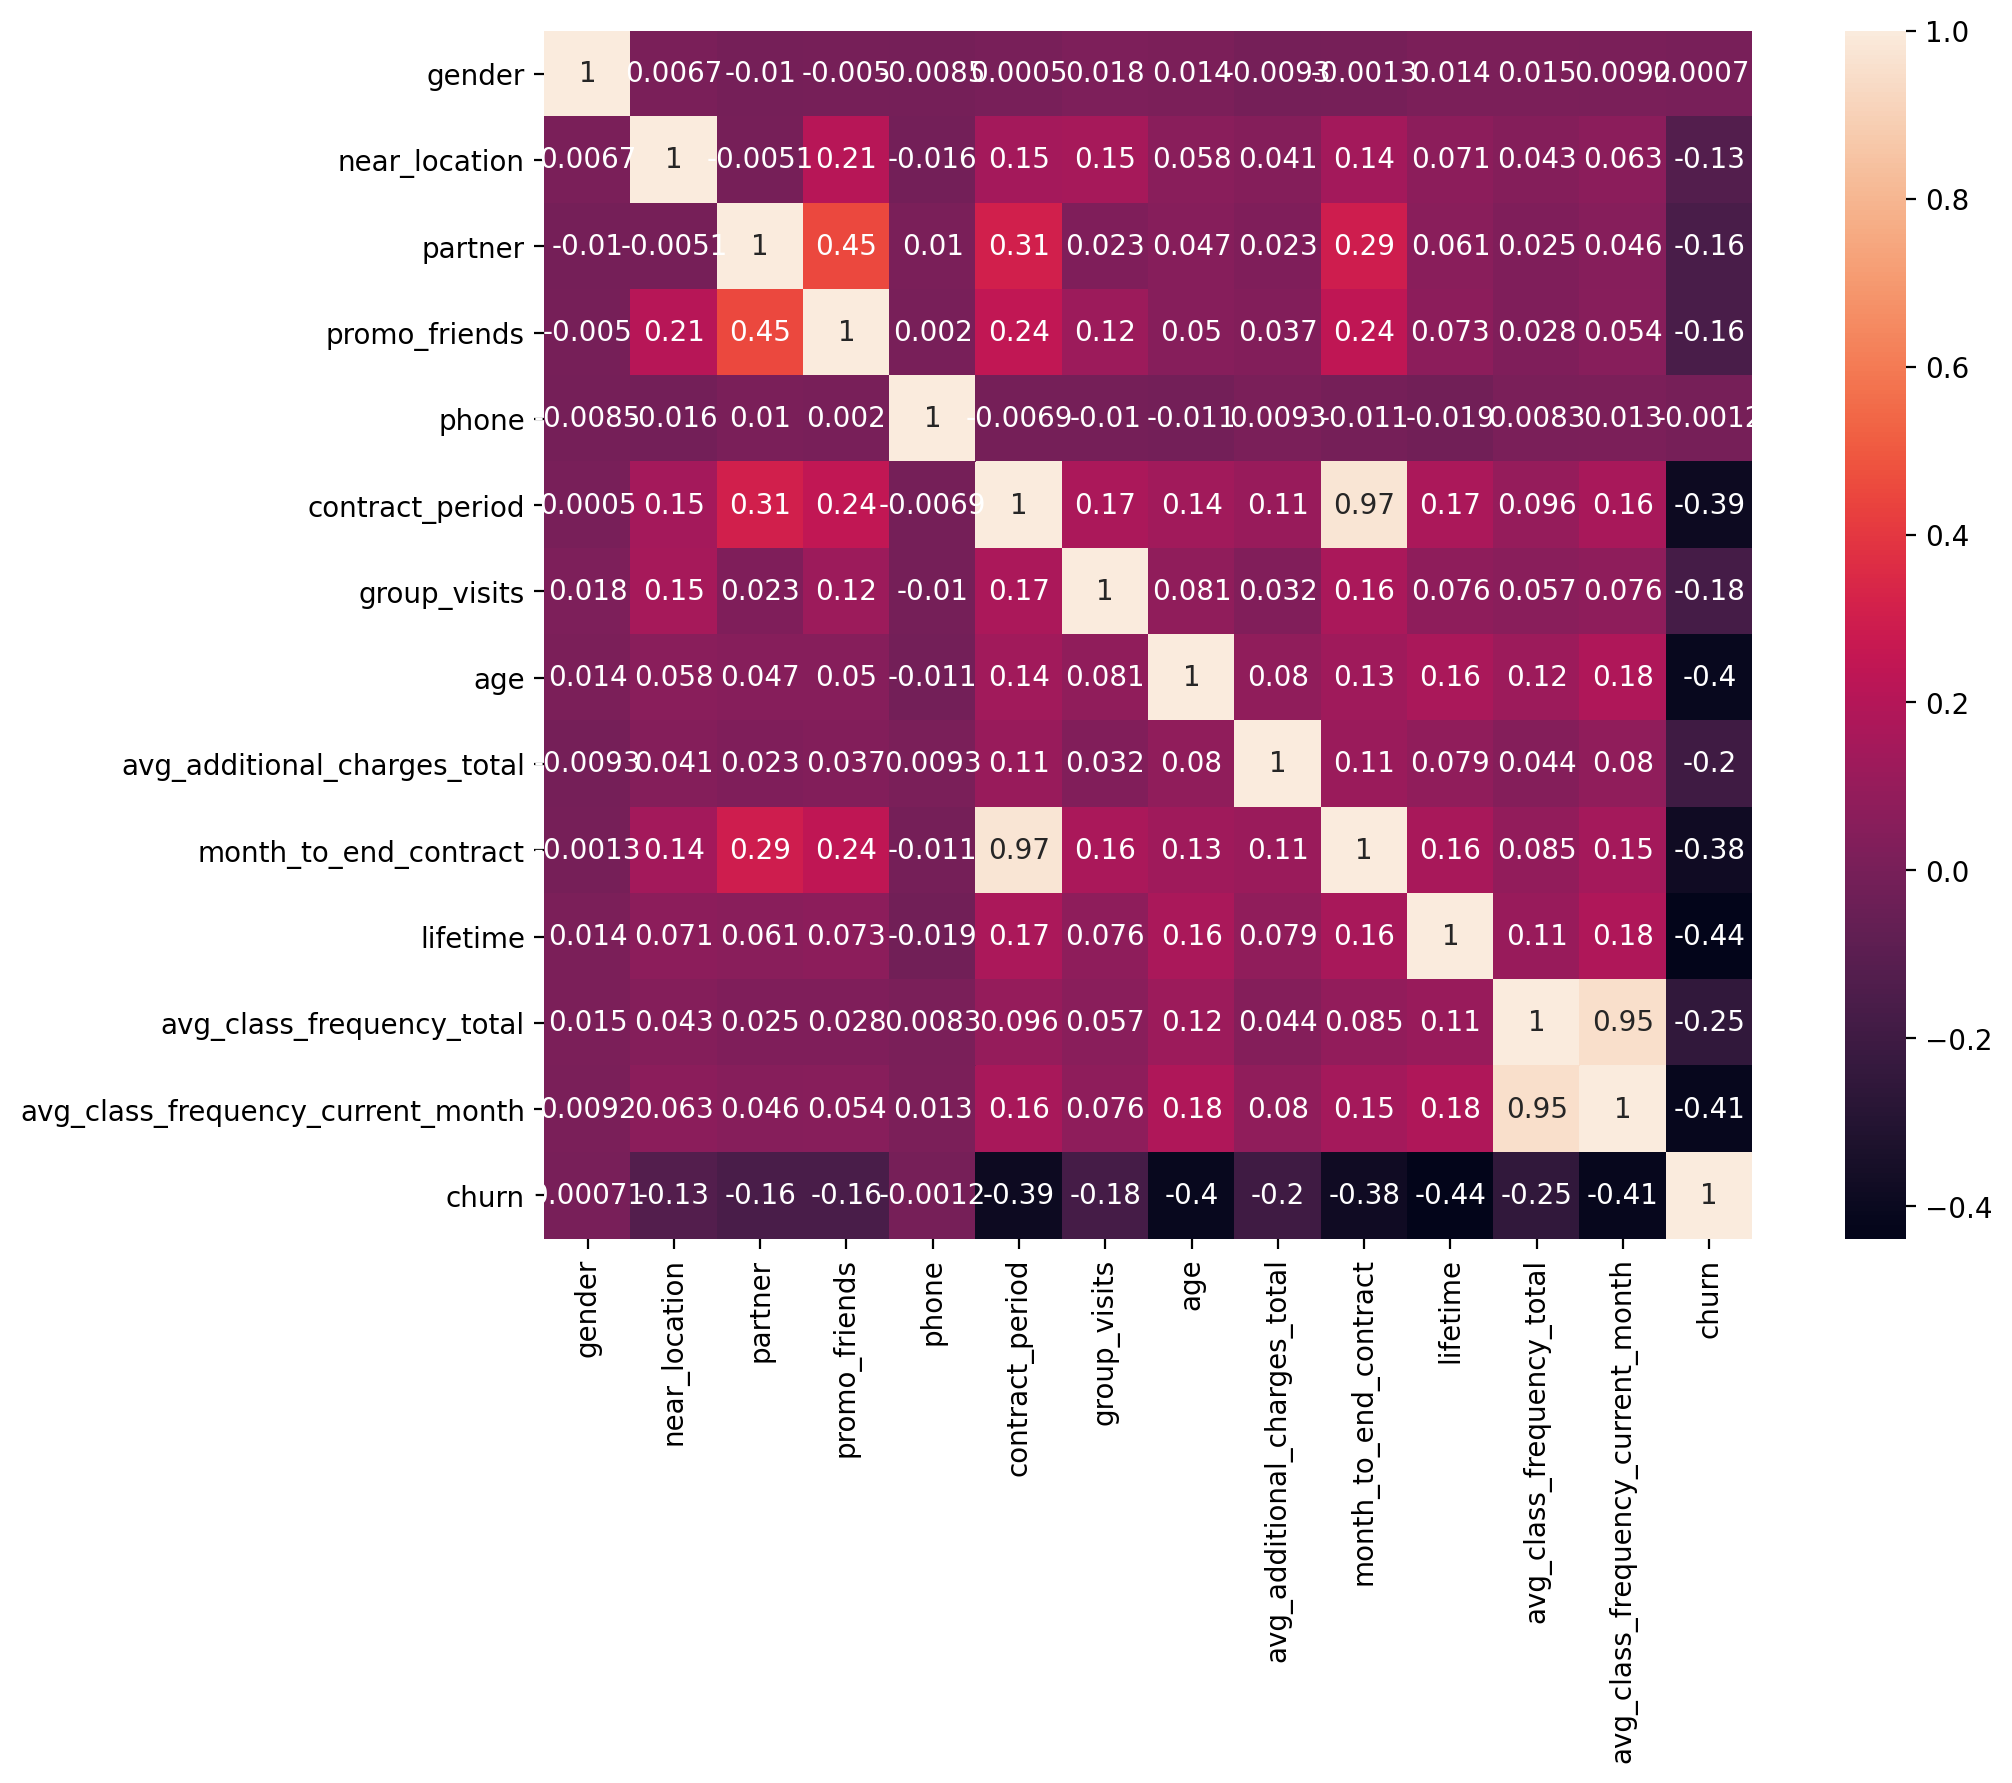

In [12]:
# Построим корреляционную матрицу числовых признаков набора данных

# корреляционная матрица
corr_m = df.corr()

# нарисуем heatmap
plt.figure(figsize=(12, 8), dpi=200)
sns.heatmap(corr_m, annot=True, square=True)

plt.show()

На тепловой карте отмечены две пары параметров с высокой корреляцией:
1. month_to_end_contract и contract_period корреляция 0.97
2. avg_class_frequency_total и avg_class_frequency_current_month корреляция 0.95 

Это выглядит вполне логично, так как среднее число посещений клиента в неделю, скорее всего, не меняется от месяца к месяцу. Кроме того, если у клиента долгий срок действия контракта с фитнес-клубом, то, вероятнее всего, у него осталось много месяцев до окончания абонемента.

**Выводы по шагу 2:**
1. В датасете нет пропусков.
2. Процент оттока клиентов составляет 26,5 %.
3. Можно выделить 6 параметров, по которым имеются значительные различия между ушедшими пользователями и теми, кто остался:
* lifetime
* contract_period 
* avg_class_frequency_current_month
* promo_friends
* group_visits 

4. Имеются две пары параметров с высокой корреляцией: 
* month_to_end_contract и contract_period корреляция 0.97
* avg_class_frequency_total и avg_class_frequency_current_month корреляция 0.95

**Шаг 3.** 

**Построение модели прогнозирования оттока клиентов.**
<a id="step_3"></a>

In [13]:
# разделяем данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('churn', axis = 1)
y = df['churn']

# Удалим скоррелированные столбцы
X = X.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis = 1)

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [14]:
# Обучение модели методом логической регрессии

# задаём алгоритм для модели
model = LogisticRegression(solver='liblinear', random_state = 0) 

# обучаем модель
model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
probabilities = model.predict_proba(X_test)[:, 1]

# бинарный прогноз
predictions = model.predict(X_test)

# выведем метрики для полученного прогноза
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))


Accuracy: 0.88
Precision: 0.76
Recall: 0.77
F1: 0.77


In [15]:
# Попробуем задать кастомный порог в 0,65 для увеличения метрики Precision 
threshold = 0.45

# на основании вероятностей и соотношения классов рассчитываем predict
custom_predictions = [0 if i < threshold else 1 for i in probabilities]

# выведем все метрики для прогноза по кастомному порогу
print('Метрики для прогноза с кастомным порогом')
print('Accuracy for custom: {:.2f}'.format(accuracy_score(y_test, custom_predictions)))
print('Precision for custom: {:.2f}'.format(precision_score(y_test, custom_predictions)))
print('Recall for custom: {:.2f}'.format(recall_score(y_test, custom_predictions)))
print('F1 for custom: {:.2f}'.format(f1_score(y_test, custom_predictions)))

Метрики для прогноза с кастомным порогом
Accuracy for custom: 0.88
Precision for custom: 0.74
Recall for custom: 0.79
F1 for custom: 0.77


In [16]:
# Обучение модели методом случайного леса

# зададим алгоритм для модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# обучим модель случайного леса
rf_model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test) 
rf_probabilities = rf_model.predict_proba(X_test)[:, 1] 

# выведем метрики для полученного прогноза
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.89
Precision: 0.78
Recall: 0.77
F1: 0.78


**Выводы по шагу 3:**

1. По параметру Accuracy (точность) — доля верно угаданных ответов из всех прогнозов: лучший результат показала модель с методом случайного леса, составивший 0,96.

2. По параметру Precision (точность) — доля правильных ответов только среди целевого класса: лучший результат также показала модель с методом случайного леса, составивший 0,91.

3. По параметру Recall (полнота) — доля истинно положительных предсказаний среди всех фактических положительных случаев: лучший результат снова показала модель с методом случайного леса, составивший 0,93.

4. По параметру F1-мера (баланс между Precision и Recall) лучший результат также у модели случайного леса: 0,92.

Модель с методом случайного леса показала лучшие результаты по всем метрикам, поэтому мы рекомендуем использовать именно ее.

**Шаг 4.** 

**Кластеризация клиентов.**
<a id="step_4"></a>

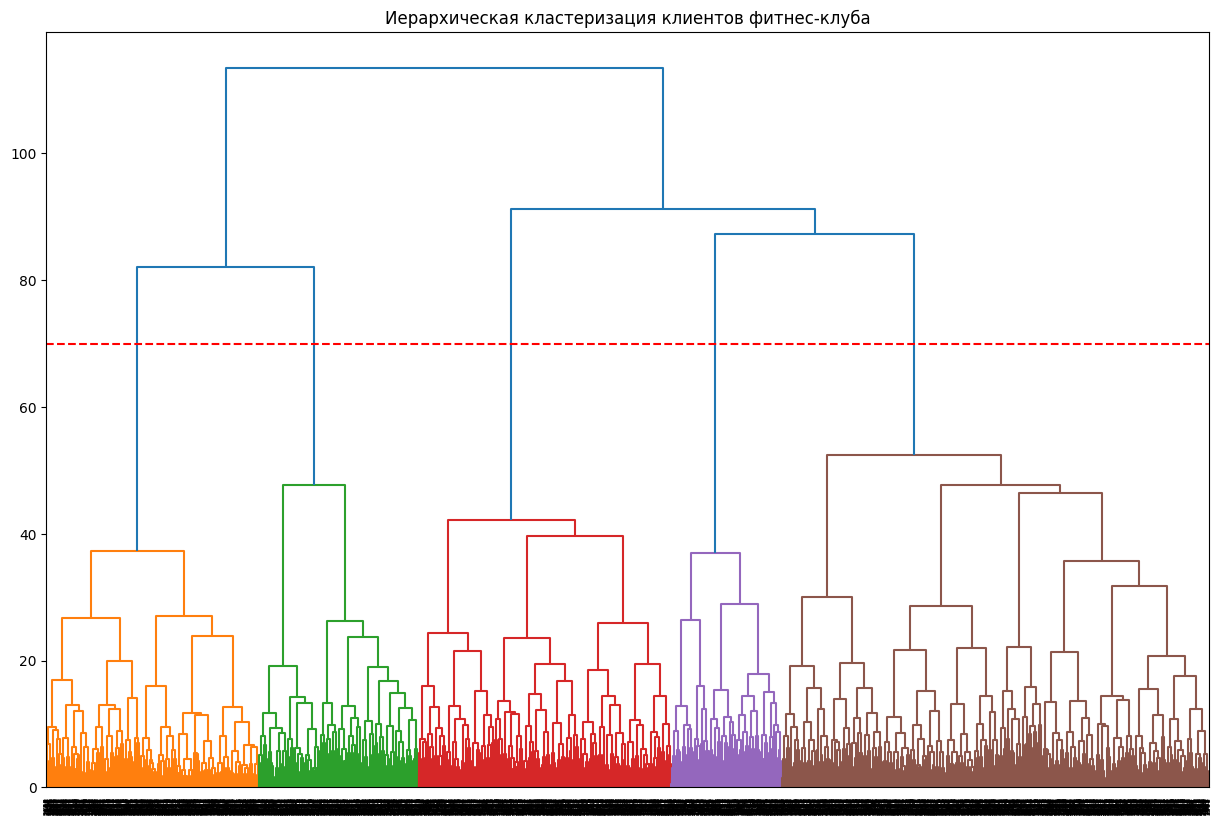

In [17]:
# Cтандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(df)

# Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков
linked = linkage(X_sc, method = 'ward') 

# Нарисуем дендрограмму
plt.figure(figsize=(15, 10), dpi=100)  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов фитнес-клуба')

# После предварительного вывода графика мы можем указать линию, на которой покажем деление на кластеры
plt.axhline(y=70, color='red', linestyle='--')
plt.show() 

На графике видно, что наибольшее вертикальное расстояние между кластерами находится в пределах от 50 до 80 (по оси Y). Соответственно, мы можем предположить, что четко выделяются пять кластеров.

In [18]:
# Задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0) 

# Прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(X_sc)

# Сохраняем метки кластера в поле нашего датасета
df['cluster_num'] = labels

# Посмотрим на средние значения признаков для кластеров
df_groupby_cluster_num = df.groupby('cluster_num').mean().reset_index()

df_groupby_cluster_num

,cluster_num,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.503676,0.000000,0.459559,0.075368,0.917279,2.069853,0.211397,28.522059,132.741216,1.950368,2.757353,1.706629,1.515890,0.450368
1,1,0.492829,0.936115,0.764016,0.534550,0.919166,10.447197,0.516297,29.962190,161.853561,9.477184,4.833116,2.788103,2.786919,0.007823
2,2,0.507917,1.000000,0.323995,0.213155,0.903776,1.546894,0.287454,26.926918,113.173051,1.500609,1.031669,1.449720,1.037592,0.961023
3,3,0.521186,0.996610,0.282203,0.208475,0.904237,1.882203,0.452542,30.237288,157.988625,1.794915,4.923729,2.203432,2.207359,0.003390
4,4,0.518895,0.968023,0.744186,0.526163,0.873547,8.859012,0.534884,29.728198,162.907495,8.155523,4.411337,0.957744,0.943967,0.024709


Распределение процентов оттока по кластерам:
* 0 - 45,0%
* 1 - 7,8%
* 2 - 96,1%
* 3 - 3,3%
* 4 - 2,4%


Мы можем отметить, что группы 1, 3 и 4 имеют самые низкие средние значения по столбцу churn. Соответственно, мы можем утверждать, что эти группы характеризуются низким процентом оттока. Для этих групп характерен высокий lifetime в районе 4,8-4,9, а также среднее количество посещений за последний месяц и за весь период.

Группа номер 2 имеет самое высокое среднее значение по столбцу churn, что позволяет утверждать, что эта группа имеет наибольший процент оттока. У этой группы следующие характеристики:
* самое низкое среднее значение по акции "Приведи друга";
* посещение групповых занятий занимает предпоследнее место;
* самое низкое среднее значение по продолжительности контракта; 
* самый низкий lifetime; 
* самое низкое среднее количество посещений в неделю.

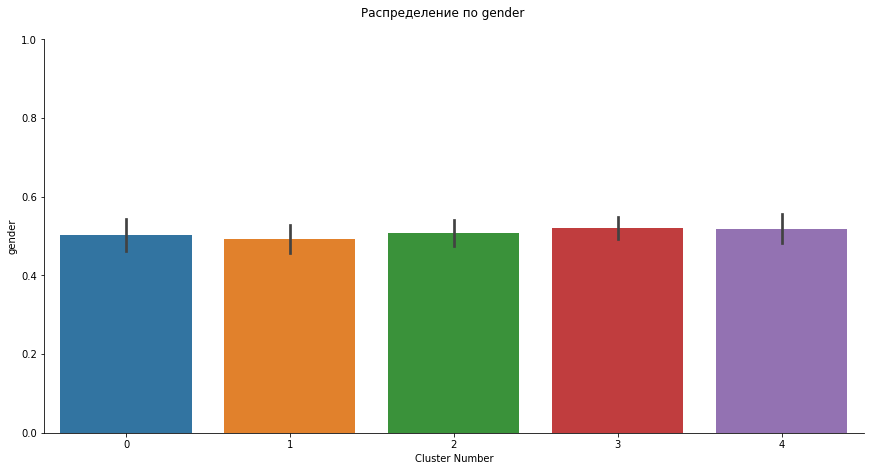

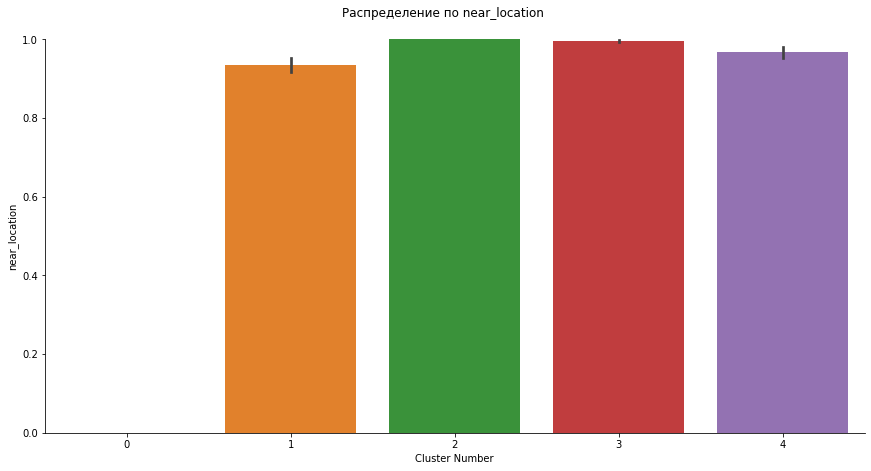

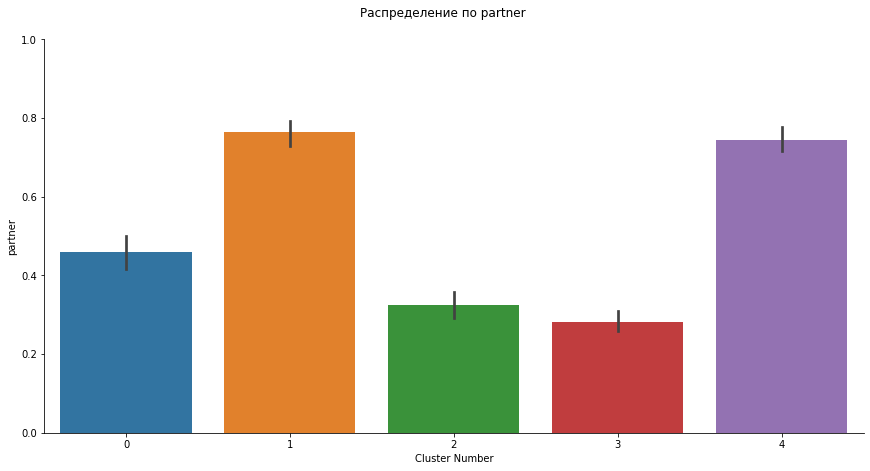

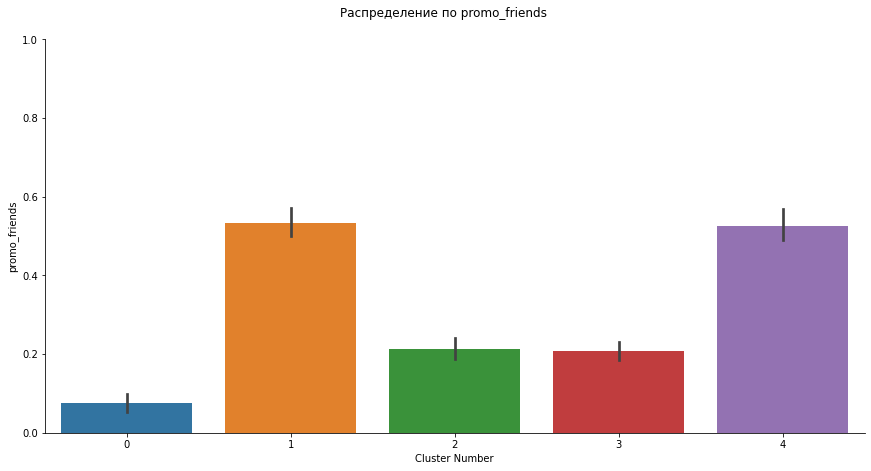

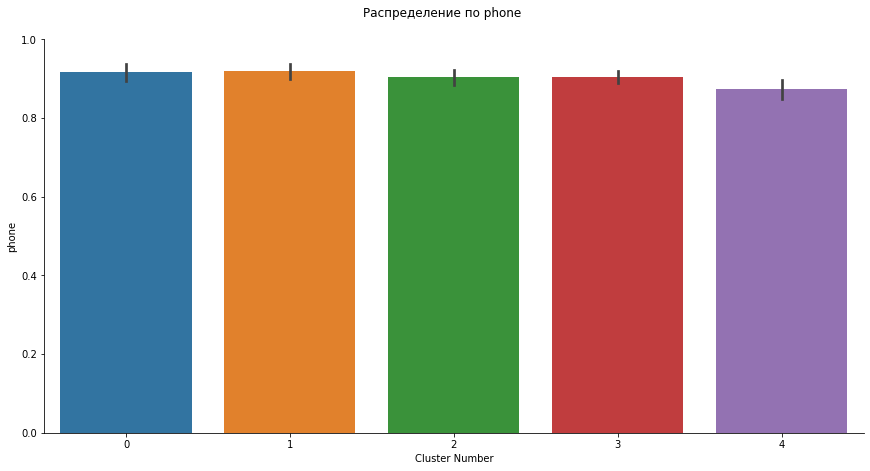

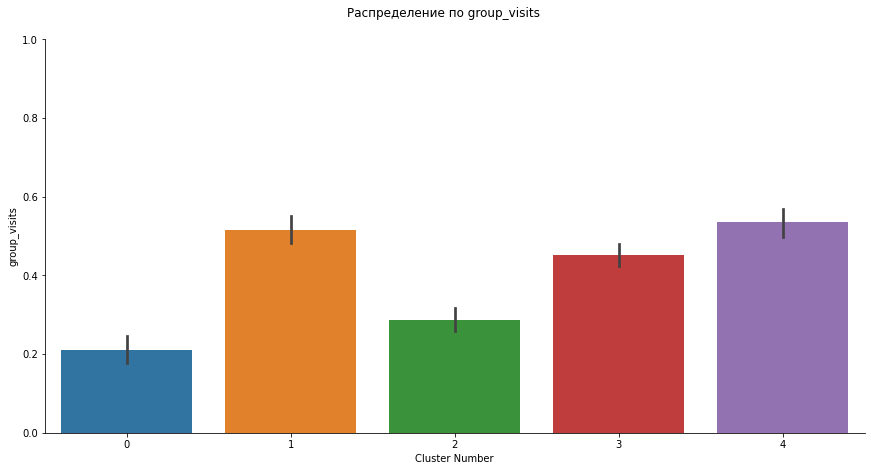

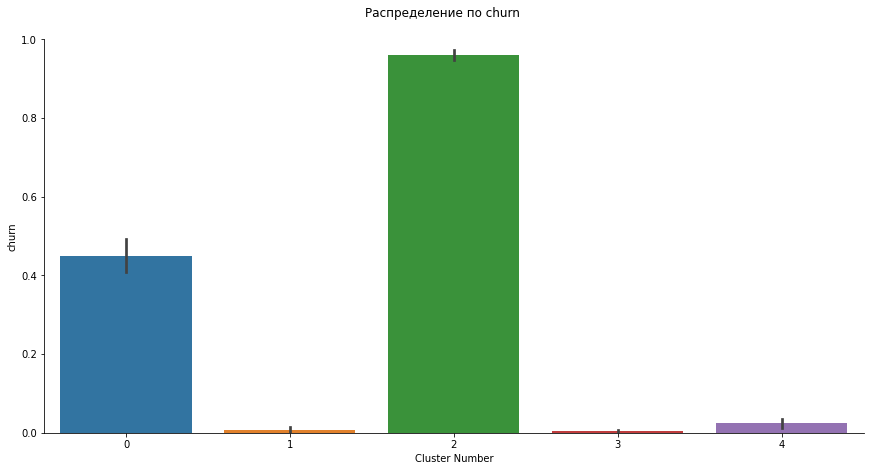

In [19]:
# Для построения распределений по кластерам сначала создадим датафрейм, 
# который будет содержать только столбцы с бинарными характеристиками
df_bin =  df.drop(['avg_additional_charges_total', 
         'month_to_end_contract', 'lifetime', 
         'avg_class_frequency_total', 
         'avg_class_frequency_current_month', 'contract_period', 'age'], axis=1)

# Создадим список с названиями столбцов и удалим из списка столбец с номером кластера
columns_list_bin = list(df_bin.columns)
columns_list_bin.remove('cluster_num')

# Выведем на печать графики с помощью цикла
for column in columns_list_bin:
    # Создание графика и сохранение его в переменную g с заданными параметрами размера
    g = sns.catplot(
        data=df_bin, # Определяем датафрейм для графиков
        x="cluster_num", # Задаем ось Х, на которой будут отображаться кластеры
        y=column, # По оси Y будут выводится характеристики из датасета
        kind="bar", 
        height=6, 
        aspect=2,)

    # Настройка графика
    g.set_axis_labels("Cluster Number", column)  # Подписываем оси
    g.set_xticklabels(["0", "1", "2", "3", "4"])  # Устанавливаем метки для оси X
    g.fig.suptitle(f"Распределение по {column}", y=1.05)  # Устанавливаем название графика
    g.set(ylim=(0, 1))  # Ограничиваем значения по оси Y

    # Отображаем график
    plt.show()

По графикам можно сделать следующие выводы:

• Пол (gender): распределение пола не зависит от кластера.

• Проживание или работа рядом с клубом (Near_Location): в кластере 0 отсутствуют клиенты, живущие или работающие рядом с клубом. Мы можем сразу дать определение кластеру **0 как клиентам, не проживающим и не работающим рядом с клубом.** В остальных кластерах эта характеристика распределена равномерно.

• Сотрудник компании-партнёра клуба (Partner): самые высокие показатели наблюдаются у кластеров 1 и 4, самые низкие – у групп 2 и 3. Эта характеристика не коррелирует с оттоком.

• Пришел по акции «приведи друга» (Promo_friends): стоит отметить, что у групп 0 и 2, которые имеют самый высокий уровень оттока, низкие показатели по этому критерию. Также этот показатель низок у группы номер 3.

• Наличие телефона (Phone): по этой характеристике у всех групп высокие показатели.

• Посещение групповых занятий (Group_visits): отмечаем, что у групп 0 и 2 (самых отточных) самые низкие показатели по этой характеристике.

• Факт оттока в текущем месяце (Churn): на этом графике сильно выделяется группа номер 2. Мы можем дать определение группе номер **2 как пользователям с гарантированным фактом оттока.** Также заметно выделяется группа номер 0.




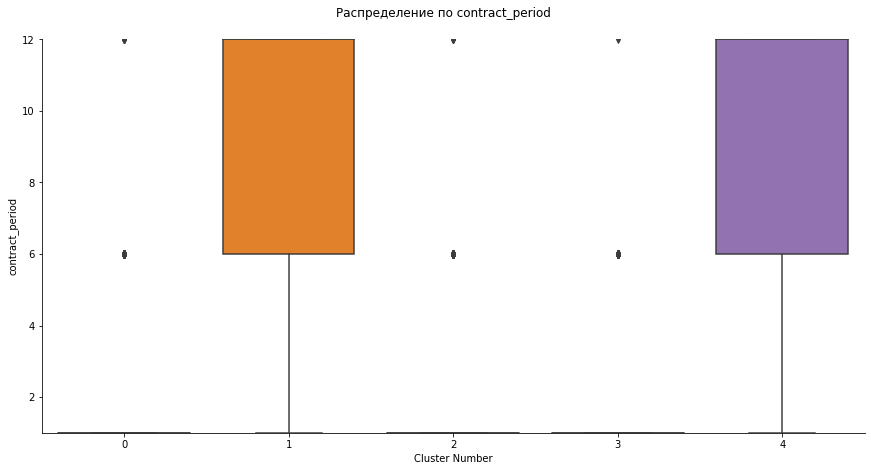

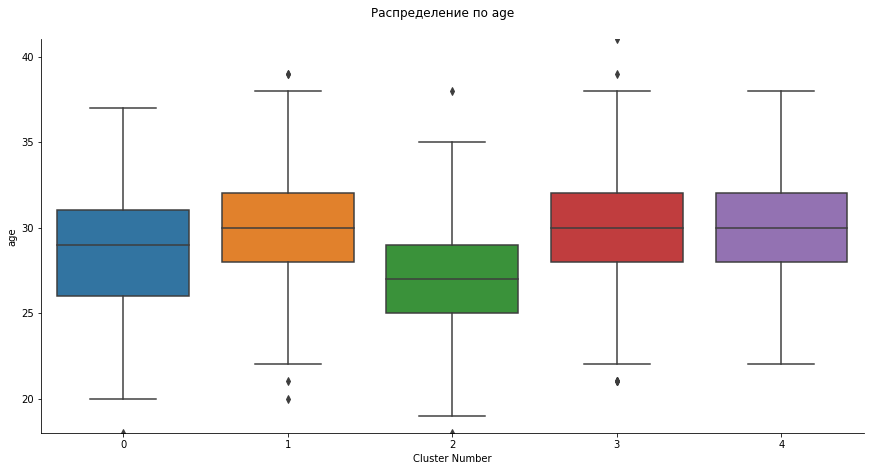

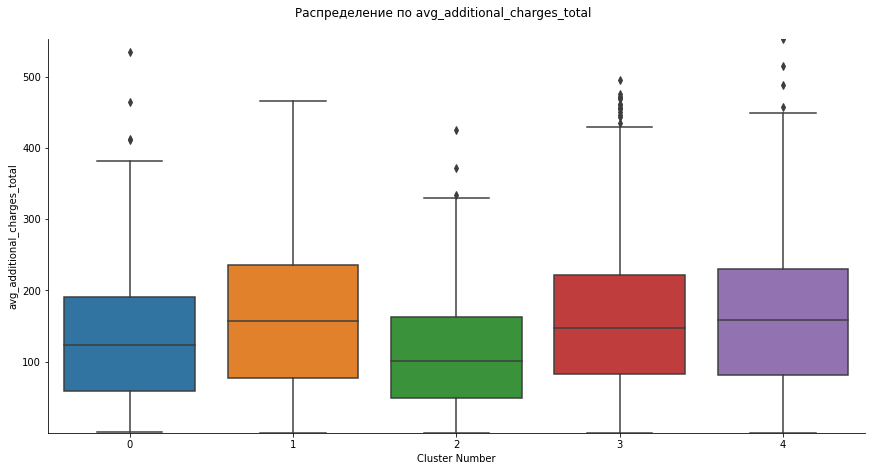

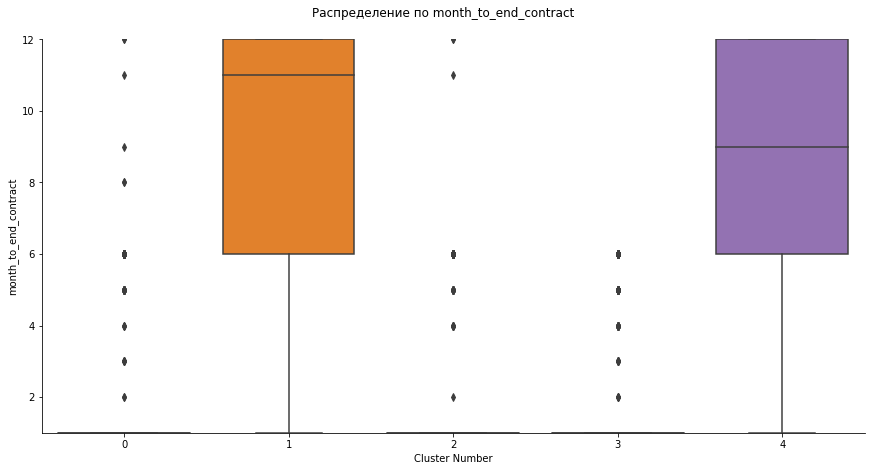

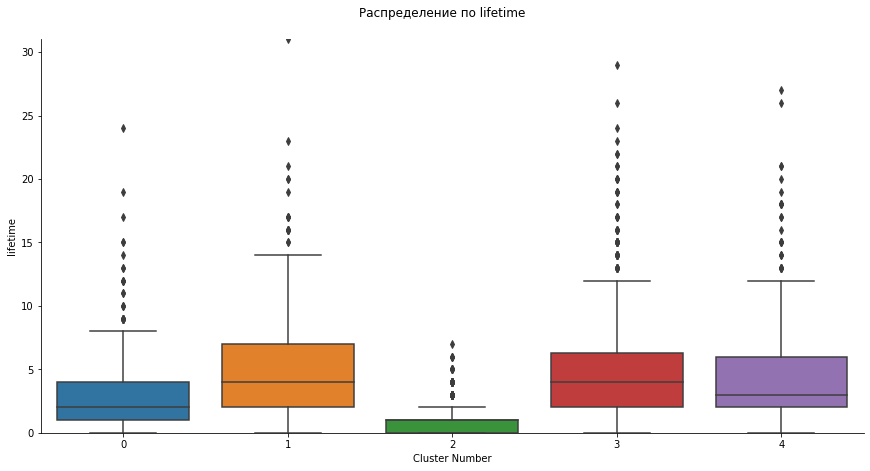

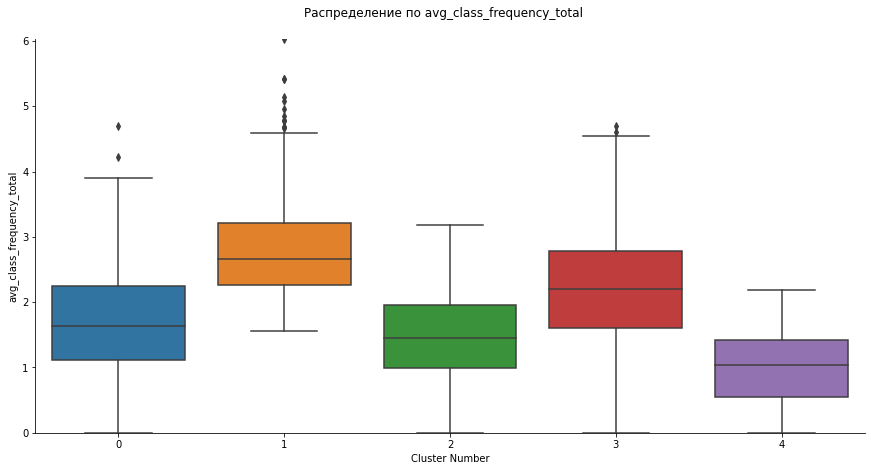

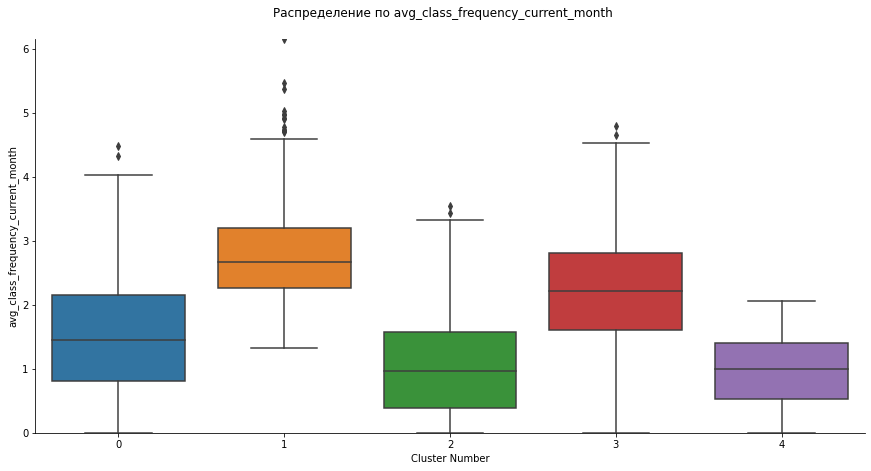

In [20]:
# Для построения распределений по кластерам сначала создадим датафрейм, 
# который будет содержать только столбцы с действительные числами
df_num =  df.drop(['gender', 
         'near_location', 'partner', 
         'promo_friends', 
         'phone', 'group_visits', 'churn'], axis=1)

# Создадим список с названиями столбцов и удалим из списка столбец с номером кластера
columns_list_num = list(df_num.columns)
columns_list_num.remove('cluster_num')

# Выведем на печать графики с помощью цикла
for column in columns_list_num:
    # Создание графика и сохранение его в переменную g с заданными параметрами размера
    g = sns.catplot(
        data=df_num, # Определяем датафрейм для графиков
        x="cluster_num", # Задаем ось Х, на которой будут отображаться кластеры
        y=column, # По оси Y будут выводится характеристики из датасета
        kind="box", 
        height=6, 
        aspect=2,)

    # Настройка графика
    g.set_axis_labels("Cluster Number", column)  # Подписываем оси
    g.set_xticklabels(["0", "1", "2", "3", "4"])  # Устанавливаем метки для оси X
    g.fig.suptitle(f"Распределение по {column}", y=1.05)  # Устанавливаем название графика
    g.set(ylim=(df_num[column].min(), df_num[column].max()))  # Автоматически устанавливаем значения по оси Y

    # Отображаем график
    plt.show()

По графикам можно сделать следующие выводы:

• Длительность текущего абонемента (Contract_period): Наблюдаются высокие показатели у групп 1 и 4. Самые низкие показатели отмечены у групп 0 и 2 (с наибольшим фактором оттока), а также у группы 3, где показатель также низкий.

• Возраст (age): Во всех группах возраст примерно одинаковый, он не коррелирует с фактором оттока.

• Суммарная выручка от других услуг (Avg_additionalcharges_total): Распределение по этой характеристике примерно равномерное. Можно отметить, что у групп 0 и 2 (с наибольшим фактором оттока) эта характеристика немного ниже, чем у остальных.

• Срок до окончания абонемента (Month_to_end_contract): Отмечаем, что больше всего времени до конца контракта у групп 1 и 4. У групп 0 и 2 (с наибольшим фактором оттока), а также у группы 3 этот показатель очень низкий.

• Время с момента первого обращения в фитнес-центр (Lifetime): На этом графике снова наблюдаются низкие показатели у групп 0 и 2 (с наибольшим фактором оттока). Также стоит отметить, что у группы 3 этот показатель сопоставим с показателями групп 1 и 4. Учитывая, что у группы 3 низкие показатели по продолжительности контракта и сроку до конца абонемента, а также хороший показатель Lifetime, мы можем охарактеризовать группу **3 как клиентов, предпочитающих непродолжительные абонементы.**

• Средняя частота посещений за последний месяц и всего (Avg_class_frequency_current_month и Avg_class_frequency_total): Эти два показателя коррелируют между собой, и их не следует рассматривать отдельно. Отмечаем, что самый высокий этот показатель у групп 1 и 3, низкие — у групп 0 и 2 (с наибольшим фактором оттока), а самый низкий — у группы 4. Теперь мы можем дать характеристики группам 1 и 4: группа **1 состоит из надежных клиентов с долгими контрактами, которые часто посещают спортзал**, а группа **4 — из надежных клиентов с долгими контрактами, которые редко посещают спортзал.**

**Выводы по шагу 4:**

Мы провели иерархическую кластеризацию клиентов фитнес-клуба и разделили их на 5 классов. Нам удалось дать описание этим классам:

0 - Клиенты, не проживающие и не работающие рядом с клубом (вероятность оттока: 45,0%).

1 – Надежные клиенты с долгими контрактами, которые часто посещают спортзал (вероятность оттока: 7,8%).

2 – Клиенты с гарантированным фактом оттока (вероятность оттока: 96,1%).

3 - Надежные клиенты, любящие короткие контракты (вероятность оттока: 3,3%).

4 - Надежные клиенты с долгими контрактами, которые редко посещают спортзал (вероятность оттока: 2,4%).

Также мы выявили основные характеристики, которые, вероятнее всего, влияют на отток:

• Клиент не проживает и не работает рядом со спортзалом.

• Клиент не участвовал в акции «Приведи друга».

• Клиент не посещает групповые занятия.

• Непродолжительный срок абонемента также может являться характеристикой, сопутствующей оттоку, но за исключением случаев, когда клиент предпочитает покупать непродолжительные абонементы.

• Клиенты с небольшим lifetime чаще отваливаются, чем клиенты, которые уже продолжительное время с клубом.

• Средняя частота посещений фитнес-клуба также может быть сопутствующей характеристикой к оттоку, но мы также наблюдаем надежных клиентов, которые редко посещают спортзал.

**Шаг 5.** 

**Формулирование выводов и разработка рекомендаций по работе с клиентами.**
<a id="step_5"></a>

Мы провели исследование датасета клиентов фитнес-центров «Культурист-датасаентист». Датасет содержит 4 000 записей. Мы выполнили предобработку данных, проверив наличие пропусков и дубликатов. 

На стадии исследовательского анализа данных (EDA) мы выявили 6 параметров, которые имеют значительные различия между ушедшими и не ушедшими пользователями: lifetime, contract_period, avg_class_frequency_current_month, promo_friends, group_visits.  

На шаге 3 мы построили три модели прогнозирования оттока клиентов. Лучший результат предсказания оттока конкретного клиента показала модель случайного леса. 

На шаге 4 мы провели иерархическую кластеризацию клиентов фитнес-клуба и разделили их на 5 классов:

0 - Клиенты, не проживающие и не работающие рядом с клубом (вероятность оттока: 45,0%).

1 - Надежные клиенты с долгими контрактами, которые часто посещают спортзал (вероятность оттока: 7,8%).

2 - Клиенты с гарантированным фактом оттока (вероятность оттока: 96,1%).

3 - Надежные клиенты, предпочитающие короткие контракты (вероятность оттока: 3,3%).

4 - Надежные клиенты с долгими контрактами, которые редко посещают спортзал (вероятность оттока: 2,4%).

Основные характеристики, которые, вероятнее всего, влияют на отток:

• Клиент не проживает и не работает рядом со спортзалом.
• Клиент не участвовал в акции «Приведи друга».

• Клиент не посещает групповые занятия.

• Непродолжительный срок абонемента также может быть характеристикой, сопутствующей оттоку, за исключением случаев, когда клиент предпочитает покупать краткосрочные абонементы.

• Клиенты с небольшим lifetime чаще отваливаются, чем клиенты, которые уже продолжительное время с клубом.

• Средняя частота посещений фитнес-клуба также может быть сопутствующей характеристикой к оттоку, однако мы наблюдаем надежных клиентов, которые редко посещают спортзал.

**Рекомендации для стратегии взаимодействия с клиентами и их удержания:**

1. Люди — существа социальные, общение — наше всё. Мы заметили, что посещение групповых занятий и участие в акции «Приведи друга» являются хорошими факторами для удержания клиентов в фитнес-клубе. Поэтому крайне желательно рекламировать новым клиентам групповые занятия и агитировать их к участию. Также для того чтобы клиенту было не скучно одному ходить в спортзал, желательно предлагать новым клиентам хорошие скидки в рамках акции «Приведи друга». 

2. Мы отметили, что долгий срок контракта также положительно влияет на удержание клиентов в клубе. Поэтому целесообразно предлагать клиентам долгосрочные контракты и предоставлять скидки на такие контракты. 

На такие факторы, как проживание рядом с клубом и количество посещений клуба в неделю, мы повлиять не можем. Клиентам, которые уже продолжительное время с клубом, не стоит спамить рекламой.